
<p align="center"><img alt="udeA logo" height="150px" src="https://github.com/freddyduitama/images/blob/master/logo.png?raw=true"></p><h1><font color='0B5345'> <center>

Informática II

 </center></font></h1>
<h2><font color='0B5345'> <center>
Parcial II: Computación numérica en python</center></font></h2>
<font  face="Courier New" size="3">

<p3><center><b><font color='0B5345' face="Lucida Calligraphy,Comic Sans MS,Lucida Console" size="5">Universidad de Antioquia - Bioingeniería</font></b> </center></p3>




Nombre: Nicole Dayanne Mejia Galvis

Cédula: 1002691558


Antes de iniciar leer cuidadosamente cada enunciado antes de responder y asegurarse de comprender completamente lo que se está solicitando. 

¡Buena suerte!

1. (50%) La electromiografía (EMG) es una técnica ampliamente utilizada en medicina y fisiología para estudiar la actividad eléctrica de los músculos. Esta actividad, conocida como electromiograma (EMG), se registra mediante electrodos colocados sobre la piel o dentro del músculo, y proporciona información valiosa sobre el funcionamiento del sistema neuromuscular.

Instrucciones:

Utilizando programación orientada a objetos, cargue dos archivos de señales de EMG que contenga datos de varios electrodos (canales).

- Cree un método que muestre la información de la señal, que describa la forma de la señal y sus dimensiones (ejemplo: número de puntos de tiempo y el número de canales)

- Defina un método que sea capaz de graficar cada par de canales de EMG en un subplot con un tamaño adecuado. El número de canales es par, por lo tanto debe organizar los subplots en una matriz de dimensiones (numerodecanales/2, numerodecanales/2). Cada canal debe tener un color distinto en el gráfico.

- Los gráficos deben tener títulos, labels, cuadrícula, nombres en los ejes y cambios en el grosor de la línea.
- Debe permitir al usuario ingresar los límites del eje x a graficar.
- En este caso el gráfico es datos vs tiempo

- Defina un método que identifique y muestre la información del valor máximo de amplitud de la señal por cada canal y archivo.

- Cree un método adicional que grafique una señal que represente el promedio de todos los canales de un archivo. Esta señal promedio debe tener un estilo de línea diferente y estar en un gráfico separado.

In [51]:
from scipy.io import loadmat
import matplotlib.pyplot as plt
import numpy as np

def subir_senal(archivo):
    try:
        return loadmat(archivo)['data']
    except FileNotFoundError:
        print(f"Error: El archivo '{archivo}' no se ha encontrado ¿estás seguro que lo pusiste bien?.")
    except Exception as e:
        print(f"Error al cargar los datos desde '{archivo}': {e}")
    return None

def informacion_senal(data, archivo):
    if data is None:
        print("No hay datos cargados.")
    else:
        num_tiempo_puntos, num_canales = data.shape
        print(f"Información de la señal '{archivo}':")
        print(f"  - Número de puntos de tiempo: {num_tiempo_puntos}")
        print(f"  - Número de canales: {num_canales}")

def plot_pcanales(data, xlim=None):
    if data is None:
        print("No hay datos cargados.")
        return

    num_plots = (data.shape[1] + 1) // 2
    fig, axs = plt.subplots(num_plots, 2, figsize=(12, 3*num_plots))

    for i in range(num_plots):
        for j in range(2):
            canal = 2*i + j
            if canal < data.shape[1]:
                axs[i, j].plot(data[:, canal], linewidth=2)
                axs[i, j].set_title(f"Canal {canal + 1}")
                axs[i, j].set_xlabel("Tiempo")
                axs[i, j].set_ylabel("Datos")
                axs[i, j].grid(True)
                axs[i, j].set_xlim(xlim)

    fig.tight_layout()
    plt.show()

def mostrar_amplitud_maxima(data, archivo):
    if data is None:
        print("No hay datos cargados.")
        return

    max_amplitudes = np.max(data, axis=0)
    for i, max_amp in enumerate(max_amplitudes):
        print(f"Archivo: {archivo}, Canal {i+1}: Valor máximo de amplitud = {max_amp}")

def graficar_señal_promedio(data, archivo):
    if data is None:
        print("No hay datos cargados.")
        return

    señal_promedio = np.mean(data, axis=1)
    plt.figure(figsize=(10, 5))
    plt.plot(señal_promedio, linewidth=2)
    plt.title(f"Señal promedio de todos los canales - {archivo}")
    plt.xlabel("Tiempo")
    plt.ylabel("Datos")
    plt.grid(True)
    plt.show()

In [60]:
archivo = "archivo1.mat"
datos = subir_senal(archivo)
informacion_senal(datos, archivo)
plot_pcanales(datos, xlim=(0, 1000))
mostrar_amplitud_maxima(datos, archivo)
graficar_señal_promedio(datos, archivo)

Error al cargar los datos desde 'archivo1.mat': 'data'
No hay datos cargados.
No hay datos cargados.
No hay datos cargados.
No hay datos cargados.


In [54]:

archivo = "archivo2.mat"
datos = subir_senal(archivo)
informacion_senal(datos, archivo)
plot_pcanales(datos, xlim=(0, 1000))
mostrar_amplitud_maxima(datos, archivo)
graficar_señal_promedio(datos, archivo)

Error al cargar los datos desde 'archivo2.mat': 'data'
No hay datos cargados.
No hay datos cargados.
No hay datos cargados.
No hay datos cargados.


2. (20%) Utilice la librería NumPy para generar una serie de señales sinusoidales con las siguientes características:

- **Frecuencia de la señal: 1 Hz.**
- **Número de muestras: 1000.**
- **Rango de amplitud: entre 1 y 5 unidades.**

Genere un total de 5 señales sinusoidales, cada una con una amplitud aleatoria dentro del rango especificado.

Utilice la librería Matplotlib para graficar las 5 señales sinusoidales en una misma figura y cada señal debe estar etiquetada con su respectiva amplitud en la leyenda.

Incluya etiquetas adecuadas en los ejes x e y de la figura, así como un título descriptivo.

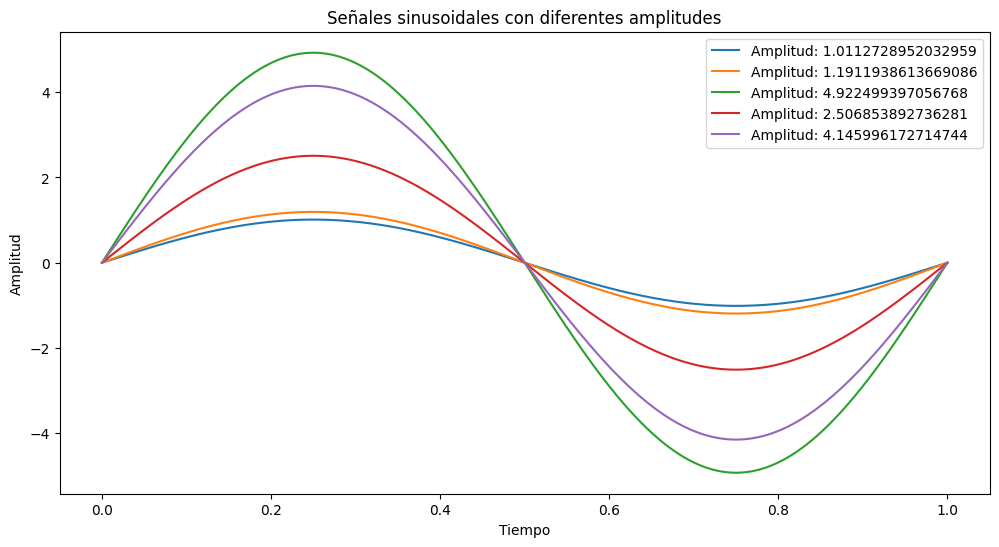

In [10]:
import numpy as np
import matplotlib.pyplot as plt


frecuencia = 1  # 1 Hz
num_muestras = 1000
rango_amplitud = (1, 5) 
num_senales = 5


plt.figure(figsize=(12, 6))

for _ in range(num_senales):
    amplitud = np.random.rand() * (rango_amplitud[1] - rango_amplitud[0]) + rango_amplitud[0] #%% en las diapositivas estaba el metodo que me generaba numeros aleatorios, solo que la otra parte no sabia cono hacer y vi un poco
    tiempo = np.linspace(0, 1, num_muestras)
    señal = amplitud * np.sin(2 * np.pi * frecuencia * tiempo)
    plt.plot(tiempo, señal, label=f"Amplitud: {amplitud}")
    
plt.xlabel('Tiempo')
plt.ylabel('Amplitud')
plt.title('Señales sinusoidales con diferentes amplitudes')
plt.legend()
plt.show()

3. (30%) Cargue el conjunto de datos de dispositivos médicos desde el archivo CSV 'datos_dispositivos.csv' utilizando la biblioteca Pandas.
Realice un análisis exploratorio de los datos utilizando métodos y funciones de Pandas: 

- Muestre las primeras filas del DataFrame para entender su estructura.
- Verifique la información básica del DataFrame, como el número de filas y columnas, los tipos de datos de cada columna y la presencia de valores nulos.
- Filtre el dataframe según la clasificación de riesgo de los dispositivos y cree un nuevo dataframe para cada uno de ellos.
- Por medio de filtros y métodos de pandas identifique los diferentes fabricantes de los dispositivos de la bases de datos y cuantos dispositivos corresponden a cada uno de los fabricantes.

In [39]:
import numpy as np
import pandas as pd 

mmse = pd.read_csv(r"datos_dispositivos.csv", sep=',')

def analizar_datos(mmse):
    num_fc=mmse.shape
    print("Número de filas y columnas:\n", num_fc)

    info_tiposd_valoresnnulos=mmse.info()#  tipos de datos y valores no nulos
    print("\nInformación del DataFrame:")
    print( info_tiposd_valoresnnulos)

    nulos=mmse.isnull().sum()
    print("\nValores nulos por columna:")
    print(nulos)

    
    dict_dataframes = {}
    
    clasificaciones_riesgo = mmse['Clasificacion_riesgo'].unique()
    
    for clasificacion in clasificaciones_riesgo:
        mmse_filtrado = mmse[mmse['Clasificacion_riesgo'] == clasificacion]
        dict_dataframes[clasificacion] = mmse_filtrado

    for clasificacion, mmse_clasificacion in dict_dataframes.items():
        print(f"Primeras filas del DataFrame de {clasificacion} riesgo:")
        print(mmse_clasificacion.head())
        print()

    
    fabricantes_dispositivos = mmse['Fabricante'].value_counts()
    print("Fabricantes y cantidad de dispositivos:")
    print(fabricantes_dispositivos)

analizar_datos(mmse)

Número de filas y columnas:
 (30, 4)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 4 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   ID                    30 non-null     int64 
 1   Nombre_dispositivo    30 non-null     object
 2   Fabricante            30 non-null     object
 3   Clasificacion_riesgo  30 non-null     object
dtypes: int64(1), object(3)
memory usage: 1.1+ KB

Información del DataFrame:
None

Valores nulos por columna:
ID                      0
Nombre_dispositivo      0
Fabricante              0
Clasificacion_riesgo    0
dtype: int64
Primeras filas del DataFrame de Bajo riesgo:
   ID                  Nombre_dispositivo   Fabricante Clasificacion_riesgo
0   1           Monitor de signos vitales      MedTech                 Bajo
3   4                          Respirador  RespiraCorp                 Bajo
7   8           Monitor de ritmo cardíaco   CardioTech      

In [40]:
mmse.columns

Index(['ID', 'Nombre_dispositivo', 'Fabricante', 'Clasificacion_riesgo'], dtype='object')

**Éxitos y recuerden que la entrega del parcial se realiza subiendo este notebook a su repositorio de github.**